In [157]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scanpy as sc
import pandas as pd

import warnings
# 过滤掉所有警告
warnings.filterwarnings('ignore')

# 读取数据
file_fold_1 = 'D:/study/learning/spatial_transcriptome/codes/SpatialGlue-main/data/Dataset11_Human_Lymph_Node_A1/adata_RNA'
file_fold_2 = 'D:/study/learning/spatial_transcriptome/codes/SpatialGlue-main/data/Dataset11_Human_Lymph_Node_A1/adata_ADT'

adata_omics_1_1 = sc.read_h5ad(file_fold_1 + '.h5ad')
adata_omics_1_2 = sc.read_h5ad(file_fold_2 + '.h5ad')

# 读取注释文件
Ann_df = pd.read_csv('D:/study/learning/spatial_transcriptome/codes/SpatialGlue-main/data/ours/4_Human_Lymph_Node/annotation.txt', sep='\t', header=None, index_col=0)
Ann_df.columns = ['Ground Truth']
adata_omics_1_1.obs['Ground Truth'] = Ann_df.loc[adata_omics_1_1.obs_names, 'Ground Truth']
adata_omics_1_2.obs['Ground Truth'] = Ann_df.loc[adata_omics_1_2.obs_names, 'Ground Truth']

# 定义类别列表
categories = ['medulla cords', 'medulla sinuses', 'cortex', 'pericapsular adipose tissue']

# 筛选数据
adata_omics_1_1 = adata_omics_1_1[adata_omics_1_1.obs['Ground Truth'].isin(categories)]
adata_omics_1_2 = adata_omics_1_2[adata_omics_1_2.obs['Ground Truth'].isin(categories)]

# 转换数据格式并计算平均值
RNA = adata_omics_1_1.X.toarray()
protein = adata_omics_1_2.X.toarray()
RNA = np.average(RNA, axis=1)
protein = np.average(protein, axis=1)

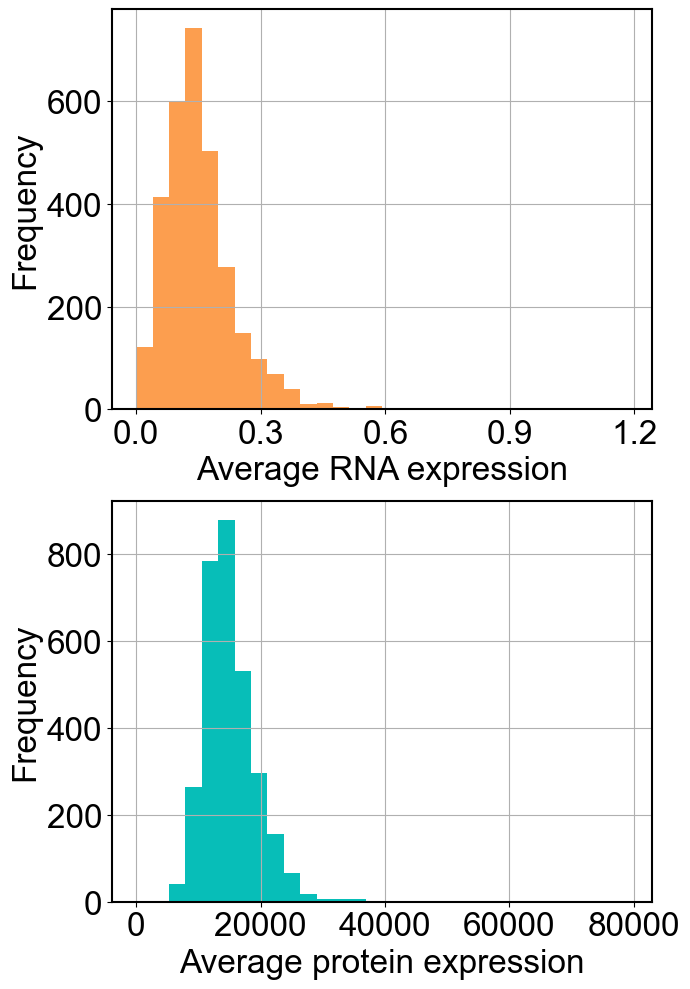

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# 设置字体大小
fontsize = 24

# 创建图形和子图
plt.figure(figsize=(7, 10))

# 绘制RNA的直方图
ax1 = plt.subplot(2, 1, 1)
hist = plt.hist(RNA, bins=30, color='#fc9e4f', alpha=1)
plt.title('')
plt.xlabel('Average RNA expression', fontsize=fontsize, fontname='Arial')
plt.ylabel('Frequency', fontsize=fontsize, fontname='Arial')
plt.tick_params(axis='both', labelsize=fontsize)  # 设置坐标轴刻度的字体大小
ticks = np.arange(0, 1.21, 0.3)
plt.xticks(ticks)
ax1.grid(True)  # 添加网格线
ax1.spines['top'].set_linewidth(1.5)  # 加粗上边框
ax1.spines['right'].set_linewidth(1.5)  # 加粗右边框
ax1.spines['bottom'].set_linewidth(1.5)  # 加粗下边框
ax1.spines['left'].set_linewidth(1.5)  # 加粗左边框

# 绘制Protein的直方图
ax2 = plt.subplot(2, 1, 2)
plt.hist(protein, bins=30, color='#07beb8', alpha=1)
plt.title('')
plt.xlabel('Average protein expression', fontsize=fontsize, fontname='Arial')
plt.ylabel('Frequency', fontsize=fontsize, fontname='Arial')
ticks = np.arange(0, 80001, 20000)
plt.xticks(ticks)
plt.tick_params(axis='both', labelsize=fontsize)
ax2.grid(True)  # 添加网格线
ax2.spines['top'].set_linewidth(1.5)  # 加粗上边框
ax2.spines['right'].set_linewidth(1.5)  # 加粗右边框
ax2.spines['bottom'].set_linewidth(1.5)  # 加粗下边框
ax2.spines['left'].set_linewidth(1.5)  # 加粗左边框

plt.tight_layout()
plt.show()

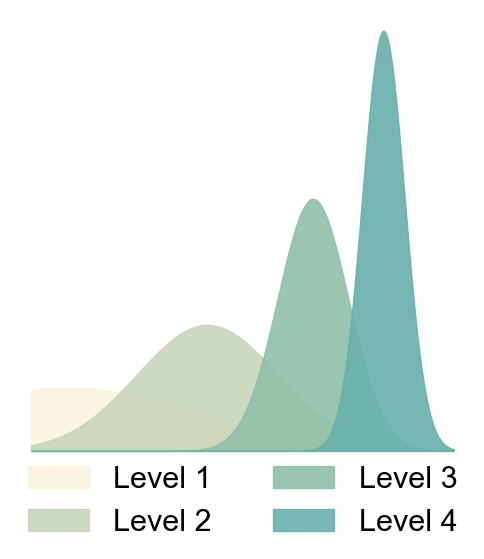

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 定义x轴的范围
x = np.linspace(-6, 6, 1000)

# 定义三个正态分布的参数
mu0, sigma0 = -5, 4  # 均值和标准差
mu1, sigma1 = -1, 2  # 均值和标准差
mu2, sigma2 = 2, 1  # 均值和标准差
mu3, sigma3 = 4, 0.6  # 均值和标准差

# 计算三个正态分布的概率密度函数值
y0 = norm.pdf(x, mu0, sigma0)
y1 = norm.pdf(x, mu1, sigma1)
y2 = norm.pdf(x, mu2, sigma2)
y3 = norm.pdf(x, mu3, sigma3)

# 绘制正态分布曲线，并填充下方区域
plt.figure(figsize=(6, 6))
plt.rcParams['font.family'] = 'Arial'
# 获取当前的Axes对象
ax = plt.gca()

# 绘制第一个正态分布曲线并填充
ax.fill_between(x, y0, color='#FAF3DD', alpha=0.9, label='Level 1')

# 绘制第一个正态分布曲线并填充
ax.fill_between(x, y1, color='#C8D5B9', alpha=0.9, label='Level 2')

# 绘制第二个正态分布曲线并填充
ax.fill_between(x, y2, color='#8FC0A9', alpha=0.9, label='Level 3')

# 绘制第三个正态分布曲线并填充
ax.fill_between(x, y3, color='#68B0AB', alpha=0.9, label='Level 4')

# 添加图例
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=2, columnspacing=2, framealpha=0, fontsize=22)


ax.set_title('')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticks([])
ax.set_yticks([])

for spine in ax.spines.values():
    spine.set_linewidth(0)

# 显示图形
plt.show()

In [158]:
## Loading package
import os
import torch

import warnings
# 过滤掉所有警告
warnings.filterwarnings('ignore')

np.random.seed(2024)


# the location of R (used for the mclust clustering)
os.environ['R_HOME'] = 'E:/R-4.3.1'
os.environ['R_USER'] = 'E:/anaconda/lib/site-packages/rpy2'
from sklearn.metrics.cluster import adjusted_rand_score
from utils_ours import mclust_R

file_fold_1 = 'D:/study/learning/spatial_transcriptome/papers/spatial_multi_omics-main/data/simulation_scenario_3/simulation3_RNA'
file_fold_2 = 'D:/study/learning/spatial_transcriptome/papers/spatial_multi_omics-main/data/simulation_scenario_3/simulation3_Protein'

adata_omics_1_1 = sc.read_h5ad(file_fold_1 + '.h5ad')
adata_omics_1_2 = sc.read_h5ad(file_fold_2 + '.h5ad')

sc.tl.pca(adata_omics_1_1)
sc.tl.pca(adata_omics_1_2)

## spatial 3
x_values = np.linspace(0, 120, 30, endpoint=False)
y_values = np.linspace(0, 120, 40, endpoint=False)

# 初始化坐标数组
coordinates = np.zeros((30 * 40, 2), dtype=int)

# 填充坐标数组
for i in range(30):
    for j in range(40):
        coordinates[i * 40 + j, 0] = x_values[i]
        coordinates[i * 40 + j, 1] = y_values[j]

# 计算每个点与点（0,0）之间的距离
distances = np.sqrt((coordinates[:, 0] - 0) ** 2 + (coordinates[:, 1] - 0) ** 2)

# 根据距离对坐标数组进行排序
# argsort()函数返回的是数组值从小到大的索引值
sorted_indices = np.argsort(distances)
sorted_coordinates = coordinates[sorted_indices]

adata_omics_1_1.obsm['spatial'] = sorted_coordinates
adata_omics_1_2.obsm['spatial'] = sorted_coordinates

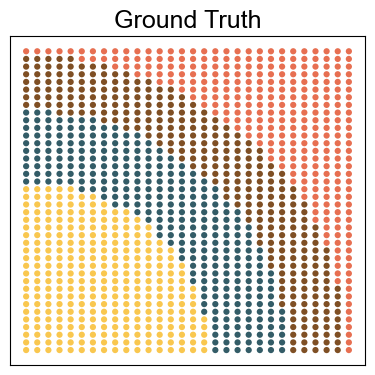

In [159]:
colors = [
    '#f9c74f', '#335c67', '#7f4f24', '#e76f51'
]
fig, ax = plt.subplots(1, 1, figsize=(4,4))
plt.rcParams['font.size'] = 15
plt.rcParams['font.sans-serif'] = 'Arial'
sc.pl.embedding(adata_omics_1_1, basis='spatial', color=['Ground Truth'], title=None, s=80, colorbar_loc=None, show=False, ax=ax, palette=colors)
# remove x, y axis
ax.set_xlabel('')
ax.set_ylabel('')
# remove legend
ax.get_legend().remove()
plt.tight_layout()
# plt.savefig('D:/study/learning/spatial_transcriptome/papers/spatial_multi_omics-main/data/simulation_scenario_4/annotation4.png')
# plt.savefig('D:/study/learning/spatial_transcriptome/papers/spatial_multi_omics-main/data/simulation_scenario_4/annotation4.eps')

In [4]:
# adata_omics_1_1.write_h5ad('D:/study/learning/spatial_transcriptome/papers/spatial_multi_omics-main/data/simulation_scenario_4/simulation4_RNA.h5ad')
# adata_omics_1_2.write_h5ad('D:/study/learning/spatial_transcriptome/papers/spatial_multi_omics-main/data/simulation_scenario_4/simulation4_Protein.h5ad')

In [4]:
## 计算核矩阵K
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy.sparse import lil_matrix
from scipy.sparse.linalg import eigs
from scipy.stats import zscore

## 带宽选择
def bandwidth_select(expr, method="SJ"):
    if method == "SJ":
        beta = np.median([np.median(np.abs(expr[i, :] - expr[i, :].mean())) for i in range(expr.shape[0])])
    elif method == "Silverman":
        beta = np.median([np.std(expr[i, :]) * len(expr[i, :])**(-1/5) for i in range(expr.shape[0])])
    print(f'bandwidth={beta}')
    return beta

## 核函数计算
def kernel_build(kerneltype, location, bandwidth):
    if kerneltype == "gaussian":
        K = np.exp(-squareform(pdist(location))**2 / bandwidth)
    elif kerneltype == "cauchy":
        K = 1 / (1 + squareform(pdist(location))**2 / bandwidth)
    elif kerneltype == "quadratic":
        ED2 = squareform(pdist(location))**2
        K = 1 - ED2 / (ED2 + bandwidth)
    return K

def kernel_build_sparse(kerneltype, location, bandwidth, tol, ncores=1):
    K = kernel_build(kerneltype, location, bandwidth)
    K_sparse = lil_matrix(K)
    for i in range(K_sparse.shape[0]):
        indices_to_keep = np.abs(K_sparse.data[K_sparse.indptr[i]:K_sparse.indptr[i+1]]) > tol
        K_sparse.data[K_sparse.indptr[i]:K_sparse.indptr[i+1]][indices_to_keep] = 0
    return K_sparse

def spatial_pca_build_kernel(location, kerneltype="gaussian", bandwidthtype="SJ", bandwidth_set_by_user=None, sparse_kernel=False, sparse_kernel_tol=1e-20, sparse_kernel_ncore=1):
    # Normalize location data
    location_normalized = zscore(location)
    
    # Select bandwidth
    if bandwidth_set_by_user is not None:
        bandwidth = bandwidth_set_by_user
    else:
        bandwidth = bandwidth_select(location_normalized, method=bandwidthtype)
    
    # Build kernel matrix
    if not sparse_kernel:
        K = kernel_build(kerneltype, location_normalized, bandwidth)
    else:
        K = kernel_build_sparse(kerneltype, location_normalized, bandwidth, sparse_kernel_tol, sparse_kernel_ncore)
    
    return K

In [16]:
# bandwidth=0.02, n_DCCA = 10, epochs = 300

file_fold_1 = 'D:/study/learning/spatial_transcriptome/papers/spatial_multi_omics-main/data/simulation_scenario_6/simulation6_RNA'
file_fold_2 = 'D:/study/learning/spatial_transcriptome/papers/spatial_multi_omics-main/data/simulation_scenario_6/simulation6_Protein'

adata_omics_1_1 = sc.read_h5ad(file_fold_1 + '.h5ad')
adata_omics_1_2 = sc.read_h5ad(file_fold_2 + '.h5ad')

adata_omics_1_1.X = adata_omics_1_1.obsm['level_3']
adata_omics_1_2.X = adata_omics_1_2.obsm['level_3']

sc.tl.pca(adata_omics_1_1)
sc.tl.pca(adata_omics_1_2)

from preprocess import fix_seed
fix_seed(2024)

# Define parameters and layers for deep model
from dcca import DCCA
K = spatial_pca_build_kernel(adata_omics_1_1.obsm['spatial'], kerneltype="gaussian", bandwidth_set_by_user=0.02, bandwidthtype="SJ")
K_centered = K - np.mean(K, axis=0) - np.mean(K, axis=1) + np.mean(K)
n_DCCA = 10

features1 = adata_omics_1_1.obsm['X_pca'].shape[1]  # Feature sizes
features2 = adata_omics_1_2.obsm['X_pca'].shape[1]
layers1 = [256, 256, n_DCCA]  # nodes in each hidden layer and the output size
layers2 = [256, 256, n_DCCA]
X = adata_omics_1_1.obsm['X_pca']
Y = adata_omics_1_2.obsm['X_pca']
X = np.dot(K_centered, X)
Y = np.dot(K_centered, Y)

use_rep = ['DCCA_X', "DCCA_Y", "DCCA"]

epochs = 300
dcca = DCCA(input_size1=features1, input_size2=features2, n_components=n_DCCA, layer_sizes1=layers1, layer_sizes2=layers2, epoch_num=epochs, learning_rate=0.001)
dcca.fit([X, Y])
Xs_transformed = dcca.transform([X, Y])
adata_omics_1_1.obsm["DCCA_X"] =  Xs_transformed[0]
adata_omics_1_2.obsm["DCCA_Y"] =  Xs_transformed[1]
adata_omics_1_1.obsm["DCCA"] = np.concatenate((adata_omics_1_1.obsm["DCCA_X"], adata_omics_1_2.obsm["DCCA_Y"]),axis=1)

use_rep = ['DCCA_X','DCCA_Y', 'DCCA']
n = 4
mclust_R(adata_omics_1_1, used_obsm=use_rep[0], num_cluster=n)
obs_df = adata_omics_1_1.obs.dropna()
ARI_1 = adjusted_rand_score(obs_df['clusters_mclust'], obs_df['Ground Truth'])
print(f'n={n}, DCCA_X, ARI = {ARI_1}')
    
mclust_R(adata_omics_1_2, used_obsm=use_rep[1], num_cluster=n)
obs_df = adata_omics_1_1.obs.dropna()
ARI_2 = adjusted_rand_score(obs_df['clusters_mclust'], obs_df['Ground Truth'])
print(f'n={n}, DCCA_Y, ARI = {ARI_2}')

mclust_R(adata_omics_1_1, used_obsm=use_rep[2], num_cluster=n)
obs_df = adata_omics_1_1.obs.dropna()
ARI_3 = adjusted_rand_score(obs_df['clusters_mclust'], obs_df['Ground Truth'])
print(f'n={n}, DCCA, ARI = {ARI_3}')

Training Progress: 100%|██████████| 300/300 [00:18<00:00, 16.50it/s]

model training finished !
fitting ...
  |                                                                      |   0%

  |======================================================================| 100%
n=4, DCCA_X, ARI = 0.8184504392008141
fitting ...
  |======================================================================| 100%
n=4, DCCA_Y, ARI = 0.8184504392008141
fitting ...
  |======================================================================| 100%
n=4, DCCA, ARI = 0.8221224377451265


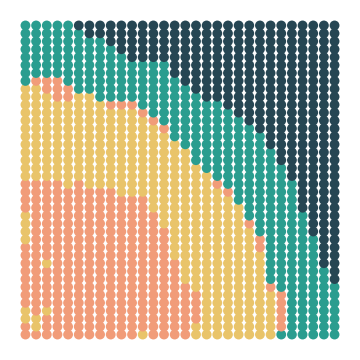

In [18]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(4, 4))  # 修正了figsize参数
colors = [
    '#f19c79', '#e9c46a', '#2a9d8f', '#264653'
]

# 设置字体大小和字体类型
plt.rcParams['font.size'] = 20
plt.rcParams['font.sans-serif'] = ['Arial']  # 确保字体列表格式正确

# 绘制第一个数据集的嵌入图
sc.pl.embedding(adata_omics_1_1, basis='spatial', color=['clusters_mclust'], title=None, s=200, colorbar_loc=None, show=False, ax=ax, palette=colors, legend_loc=None)
ax.set_title("")
ax.set_xlabel('')
ax.set_ylabel('')
# 显示图表

for spine in ax.spines.values():
    spine.set_visible(False)

# 调整子图参数，减少四周空白区域
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

plt.tight_layout()

In [ ]:
# 假设adata_omics_1_1.obs['Ground Truth']是你的DataFrame列
# # 获取现有的类别
# categories = adata_omics_1_1.obs['Ground Truth'].cat.categories

# # 添加新的类别'e'
# categories = np.append(categories, 'e')
# adata_omics_1_1.obs['Ground Truth'] = adata_omics_1_1.obs['Ground Truth'].cat.set_categories(categories)

# 随机选择20个点的索引
random_indices = np.random.choice(adata_omics_1_1.obs['Ground Truth'].index, size=100, replace=False)

# 将这些点的类别更改为'e'
adata_omics_1_1.obs.loc[random_indices, 'Ground Truth'] = 'e'

In [20]:
adata_omics_1_1_copy = adata_omics_1_1.copy()
adata_omics_1_2_copy = adata_omics_1_2.copy()

In [21]:
# 计算非零元素的均值
non_zero_mean = np.mean(adata_omics_1_1_copy.X[adata_omics_1_1_copy.X != 0])

# 计算非零元素的方差
non_zero_var = np.var(adata_omics_1_1_copy.X[adata_omics_1_1_copy.X != 0])

non_zero_count = np.count_nonzero(adata_omics_1_1_copy.X)
print("非零元素的个数:", non_zero_count)

print("非零元素的均值:", non_zero_mean)
print("非零元素的方差:", non_zero_var)

# 计算非零元素的均值
non_zero_mean = np.mean(adata_omics_1_2_copy.X[adata_omics_1_2_copy.X != 0])

# 计算非零元素的方差
non_zero_var = np.var(adata_omics_1_2_copy.X[adata_omics_1_2_copy.X != 0])

non_zero_count = np.count_nonzero(adata_omics_1_2_copy.X)
print("非零元素的个数:", non_zero_count)

print("非零元素的均值:", non_zero_mean)
print("非零元素的方差:", non_zero_var)

非零元素的个数: 3600000
非零元素的均值: -0.025359238
非零元素的方差: 0.98177826
非零元素的个数: 37200
非零元素的均值: 0.109501034
非零元素的方差: 1.5895997


In [181]:
# no noise: ours: 0.899519601, spatialglue: 0.601
#  1,1,0,0,0,0      0.8995196007969621 0.5435555996927712
#  0,0,1,1,0,0      0.9130178995630315 0.547676117577031
#  1,1,1,1,0,0  0.8739084174609202, 0.5039363375613336
#  0,0,0,0,0.1,0.1  0.9093663103030433 0.5454875618365144


#  2,2,2,2,0,0  0.5170340008513142   0.2533915218581505

from utils import generate_noise
mean1 = np.mean(adata_omics_1_1_copy.X)
mean2 = np.mean(adata_omics_1_2_copy.X)

std1 = 0
std2 = 0

dropout_rate_1 = 0.2
dropout_rate_2 = 0.2
## 'gaussian' or 'dropout'
adata_omics_1_1.obsm['level_3'] = generate_noise(adata_omics_1_1_copy.X, mean=mean1, std=std1, mode='dropout', dropout_rate=dropout_rate_1)
adata_omics_1_2.obsm['level_3'] = generate_noise(adata_omics_1_2_copy.X, mean=mean2, std=std2, mode='dropout', dropout_rate=dropout_rate_2)

7.01472154695794
7.410527610135875


In [182]:
adata_omics_1_1.write_h5ad('D:/study/learning/spatial_transcriptome/papers/spatial_multi_omics-main/data/simulation_scenario_8/simulation8_RNA.h5ad')
adata_omics_1_2.write_h5ad('D:/study/learning/spatial_transcriptome/papers/spatial_multi_omics-main/data/simulation_scenario_8/simulation8_Protein.h5ad')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scanpy as sc
import pandas as pd

import warnings
# 过滤掉所有警告
warnings.filterwarnings('ignore')
## Loading package
import os
np.random.seed(2024)
# the location of R (used for the mclust clustering)
os.environ['R_HOME'] = 'E:/R-4.3.1'
os.environ['R_USER'] = 'E:/anaconda/lib/site-packages/rpy2'
from sklearn.metrics.cluster import adjusted_rand_score
from utils_ours import mclust_R

file_fold_1 = 'D:/study/learning/spatial_transcriptome/papers/spatial_multi_omics-main/data/simulation_scenario_6/simulation6_RNA'
file_fold_2 = 'D:/study/learning/spatial_transcriptome/papers/spatial_multi_omics-main/data/simulation_scenario_6/simulation6_Protein'

adata_omics_1_1 = sc.read_h5ad(file_fold_1 + '.h5ad')
adata_omics_1_2 = sc.read_h5ad(file_fold_2 + '.h5ad')

sc.tl.pca(adata_omics_1_1)
sc.tl.pca(adata_omics_1_2)

In [6]:
adata_omics_1_1

AnnData object with n_obs × n_vars = 1200 × 3000
    obs: 'Ground Truth', 'batch', 'clusters_mclust'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'Ground Truth_colors', 'pca'
    obsm: 'X_pca', 'level_1', 'level_2', 'level_3', 'spatial', 'DCCA_X', 'DCCA'
    varm: 'PCs'

In [3]:
# bandwidth=0.02, n_DCCA = 10, epochs = 300
from preprocess import fix_seed
fix_seed(2024)

# Define parameters and layers for deep model
from dcca import DCCA
K = spatial_pca_build_kernel(adata_omics_1_1.obsm['spatial'], kerneltype="gaussian", bandwidth_set_by_user=0.02, bandwidthtype="SJ")
K_centered = K - np.mean(K, axis=0) - np.mean(K, axis=1) + np.mean(K)
n_DCCA = 10

features1 = adata_omics_1_1.obsm['X_pca'].shape[1]  # Feature sizes
features2 = adata_omics_1_2.obsm['X_pca'].shape[1]
layers1 = [256, 256, n_DCCA]  # nodes in each hidden layer and the output size
layers2 = [256, 256, n_DCCA]
X = adata_omics_1_1.obsm['X_pca']
Y = adata_omics_1_2.obsm['X_pca']
X = np.dot(K_centered, X)
Y = np.dot(K_centered, Y)

use_rep = ['DCCA_X', "DCCA_Y", "DCCA"]

epochs = 300
dcca = DCCA(input_size1=features1, input_size2=features2, n_components=n_DCCA, layer_sizes1=layers1, layer_sizes2=layers2, epoch_num=epochs, learning_rate=0.001)
dcca.fit([X, Y])
Xs_transformed = dcca.transform([X, Y])
adata_omics_1_1.obsm["DCCA_X"] =  Xs_transformed[0]
adata_omics_1_2.obsm["DCCA_Y"] =  Xs_transformed[1]
adata_omics_1_1.obsm["DCCA"] = np.concatenate((adata_omics_1_1.obsm["DCCA_X"], adata_omics_1_2.obsm["DCCA_Y"]),axis=1)

use_rep = ['DCCA_X','DCCA_Y', 'DCCA']
n = 4
mclust_R(adata_omics_1_1, used_obsm=use_rep[0], num_cluster=n)
cluster_CCA = np.array(adata_omics_1_1.obs['clusters_mclust'].astype(int))
obs_df = adata_omics_1_1.obs.dropna()
ARI_1 = adjusted_rand_score(obs_df['clusters_mclust'], obs_df['Ground Truth'])
print(f'n={n}, DCCA_X, ARI = {ARI_1}')
    
mclust_R(adata_omics_1_2, used_obsm=use_rep[1], num_cluster=n)
cluster_CCA = np.array(adata_omics_1_2.obs['clusters_mclust'].astype(int))
ARI_2 = adjusted_rand_score(obs_df['clusters_mclust'], obs_df['Ground Truth'])
print(f'n={n}, DCCA_Y, ARI = {ARI_2}')

mclust_R(adata_omics_1_1, used_obsm=use_rep[2], num_cluster=n)
cluster_CCA = np.array(adata_omics_1_1.obs['clusters_mclust'].astype(int))
ARI_3 = adjusted_rand_score(obs_df['clusters_mclust'], obs_df['Ground Truth'])
print(f'n={n}, DCCA, ARI = {ARI_3}')

NameError: name 'spatial_pca_build_kernel' is not defined

In [156]:
from SpatialGlue.preprocess import construct_neighbor_graph, fix_seed
data_type = '10x'
# Fix random seed
random_seed = 2022
fix_seed(random_seed)

adata_omics_1_1.obsm['feat'] = adata_omics_1_1.obsm['X_pca']
adata_omics_1_2.obsm['feat'] = adata_omics_1_2.obsm['X_pca']
data = construct_neighbor_graph(adata_omics_1_1, adata_omics_1_2, datatype=data_type)

# define model
from SpatialGlue.SpatialGlue_pyG import Train_SpatialGlue
model = Train_SpatialGlue(data, datatype=data_type)

# train model
output = model.train()

adata = adata_omics_1_1.copy()
adata.obsm['emb_latent_omics1'] = output['emb_latent_omics1'].copy()
adata.obsm['emb_latent_omics2'] = output['emb_latent_omics2'].copy()
adata.obsm['SpatialGlue'] = output['SpatialGlue'].copy()
adata.obsm['alpha'] = output['alpha']
adata.obsm['alpha_omics1'] = output['alpha_omics1']
adata.obsm['alpha_omics2'] = output['alpha_omics2']

from SpatialGlue.utils import clustering
tool = 'mclust' # mclust, leiden, and louvain
clustering(adata, key='SpatialGlue', add_key='SpatialGlue', n_clusters=4, method=tool, use_pca=True)

obs_df = adata.obs.dropna()
ARI = adjusted_rand_score(obs_df['SpatialGlue'], obs_df['Ground Truth'])
print(ARI)

100%|██████████| 200/200 [00:04<00:00, 44.11it/s]

Model training finished!

fitting ...
  |                                                                      |   0%

  |======================================================================| 100%
0.5063216848887515
